In [1]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('job_details_with_cluster.csv')
df.head()

,job_title,job_desc,tokens,cluster,title_tokens
0,(Urgent!) IT Support,Permanent\r\nLogging and processing support ca...,urgent support permanent logging processing su...,2,urgent support
1,.Net Developer,Job Summary\r\nAbout Us\r\nInfosys is a leadin...,.net developer infosys leading provider next-g...,4,.net developer
2,.Net Software Engineers,Joining Accenture provides you with the opport...,.net software engineers joining accenture prov...,3,.net software engineers
3,2nd / 3rd Line Technical Support Engineer,Permanent\r\nRoles & Responsibilities\r\nOn a ...,line technical support engineer permanent role...,2,line technical support engineer
4,AMOS Support Specialist,Roles & Responsibilities\r\nLufthansa Systems ...,amos support specialist roles responsibilities...,2,amos support specialist


In [3]:
edu_dict = {
    "Degree" : ["degree"],
    "Diploma" : ["polytechnic", "poly"],
    "Bachelor" : ["bachelor", "Undergraduate", "graduate"],
    "Master" : [ "master", "postgraduate", "post-graduate", "postgrad"],
    "Phd" : ["phd", "doctor", "doctoral"],
    "Experienced" : ["working experience", "work experience"] 
}

def get_edu_level(desc):
    edu = []
    for key, values in edu_dict.items():
        for value in values:
            s = re.search(value, desc, re.IGNORECASE)
            if s:
#                 print(s.group(0))
                edu.append(key)
                break

    if len(edu) == 0:
        edu_str = 'Not-mentioned'
    else:
        edu_str = " ".join(edu)

    return edu_str

In [4]:
# get_edu_level from job_desc, add it to new column edu_level
df["edu_level"] = df.job_desc.apply(lambda x: get_edu_level(x))
df.head()

# get_edu_level from one job_desc
# get_edu_level(df.job_desc.iloc[1])

,job_title,job_desc,tokens,cluster,title_tokens,edu_level
0,(Urgent!) IT Support,Permanent\r\nLogging and processing support ca...,urgent support permanent logging processing su...,2,urgent support,Not-mentioned
1,.Net Developer,Job Summary\r\nAbout Us\r\nInfosys is a leadin...,.net developer infosys leading provider next-g...,4,.net developer,Degree Bachelor Master
2,.Net Software Engineers,Joining Accenture provides you with the opport...,.net software engineers joining accenture prov...,3,.net software engineers,Degree Bachelor
3,2nd / 3rd Line Technical Support Engineer,Permanent\r\nRoles & Responsibilities\r\nOn a ...,line technical support engineer permanent role...,2,line technical support engineer,Degree Bachelor
4,AMOS Support Specialist,Roles & Responsibilities\r\nLufthansa Systems ...,amos support specialist roles responsibilities...,2,amos support specialist,Experienced


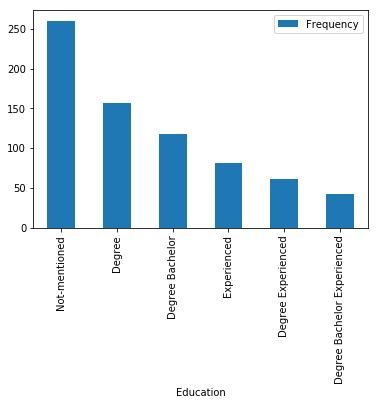

In [16]:
edu_all = df['edu_level'].tolist()
edu_fd = nltk.FreqDist(edu_all)
rslt = pd.DataFrame(edu_fd.most_common(len(edu_dict)),
                    columns=['Education', 'Frequency']).set_index('Education')
rslt.plot(kind="bar")

In [5]:
# Join the edu_level, groupby by their label of clusters
edu_clusters = df.groupby("cluster").apply(lambda g:" ".join(g.edu_level)).tolist()

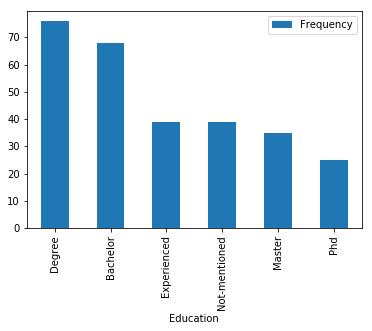

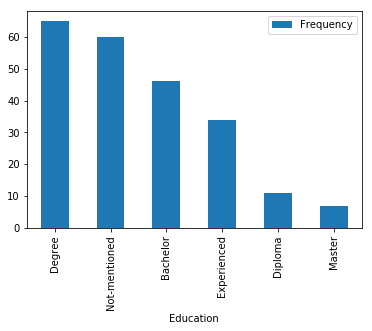

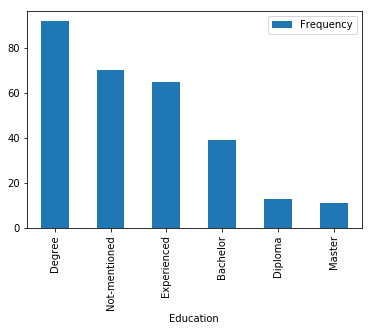

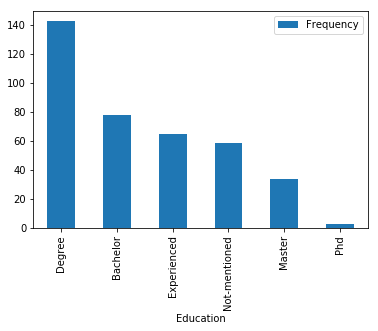

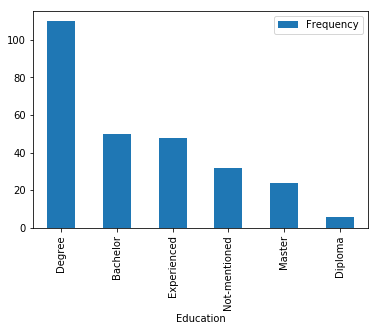

In [18]:
# For each cluster, generate wordcloud/bar diagram for the edu_levels
for idx, values in enumerate(edu_clusters):
    fd = nltk.FreqDist(values.split(' '))
    rslt = pd.DataFrame(fd.most_common(len(edu_dict)),
                    columns=['Education', 'Frequency']).set_index('Education')
    rslt.plot(kind="bar")
#     rslt.iplot(kind="bar")
    

In [18]:
# for single test, from here to the end, no need to run
desc = df.job_desc.iloc[3]

# edu_dict = {
#     "Degree" : ["degree"],
#     "Diploma" : ["polytechnic", "poly", "diploma"],
#     "Bachelor" : ["bachelor", "Undergraduate", "graduate"],
#     "Master" : [ "master", "postgraduate", "post-graduate", "postgrad"],
#     "Phd" : ["phd", "doctor", "doctoral"],
#     "Experienced" : ["working experience", "work experience"] 
# }

edu = []
for key, values in edu_dict.items():
    for value in values:
        s = re.search(value, desc, re.IGNORECASE)
        if s:
            print(s.group(0))
            edu.append(key)
            break

if len(edu) == 0:
    edu_str = 'Not-mentioned'
else:
    edu_str = " ".join(edu)
    
edu_str


Degree
Bachelor


'Degree Bachelor'